### Ascribing Machine Learning Classifiers to diagnose the attacks of *Alternaria solani* on Leaves of *Solanum tuberosum*

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2022-12-27 15:52:25

DATASET: https://github.com/Anurag-Dutta/Maneuvering-Machine-Learning-Algorithms-to-presage-the-attacks-of-Alternaria-solani-on-Potato-Leaves/tree/main/dataset

### Load Modules

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### Prepare/collect data

In [167]:
import os

path = os.listdir('dataset/')
classes = {'Healthy':0, 'Early Blight':1}

In [168]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [169]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [170]:
np.unique(Y)

array([0, 1])

In [171]:
pd.Series(Y).value_counts()

1    1000
0     152
dtype: int64

In [172]:
X.shape, X_updated.shape

((1152, 200, 200), (1152, 40000))

### Visualize data

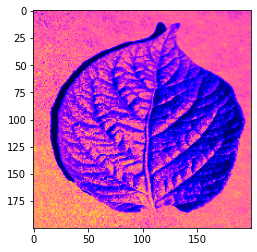

In [173]:
plt.imshow(X[0], cmap='gnuplot2')

### Prepare data

In [174]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1152, 40000)

### Split Data

In [175]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [176]:
xtrain.shape, xtest.shape

((921, 40000), (231, 40000))

### Feature Scaling

In [177]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

254 0
255 0
0.996078431372549 0.0
1.0 0.0


### Feature Selection: PCA

In [178]:
from sklearn.decomposition import PCA

In [179]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(921, 40000) (231, 40000)


In [180]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [182]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [183]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [184]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [185]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [186]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [187]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

### Evaluation

In [188]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9047619047619048


In [189]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.98914223669924
Testing Score: 0.9437229437229437


In [190]:
print("Training Score:", knc.score(xtrain, ytrain))
print("Testing Score:", knc.score(xtest, ytest))

Training Score: 0.9153094462540716
Testing Score: 0.8528138528138528


In [191]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Testing Score:", rfc.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8831168831168831


In [192]:
print("Training Score:", gnb.score(xtrain, ytrain))
print("Testing Score:", gnb.score(xtest, ytest))

Training Score: 0.9348534201954397
Testing Score: 0.922077922077922


In [193]:
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8095238095238095


### Prediction (SVM)

Precision:  0.9514563106796117
Recall:  0.9849246231155779
F1 Score:  0.9679012345679012


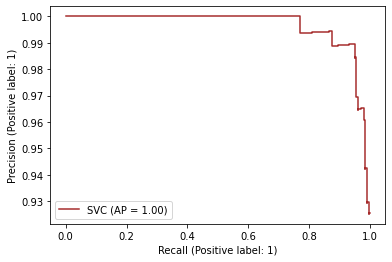

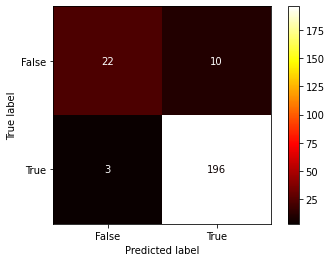

In [194]:
from sklearn import metrics
pred = sv.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(sv, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (RF)

Precision:  0.8873873873873874
Recall:  0.9899497487437185
F1 Score:  0.9358669833729216


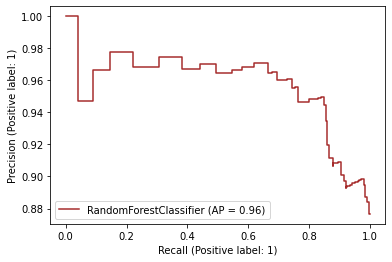

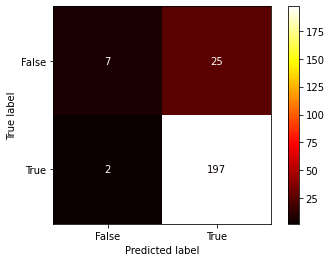

In [195]:
from sklearn import metrics
pred = rfc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(rfc, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (KNN)

Precision:  0.9881656804733728
Recall:  0.8391959798994975
F1 Score:  0.907608695652174


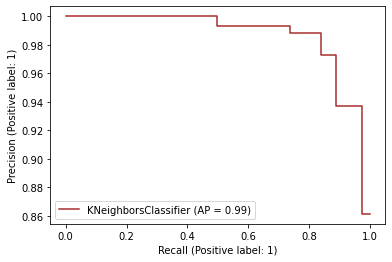

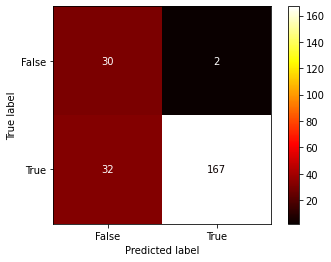

In [196]:
from sklearn import metrics
pred = knc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(knc, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (GNB)

Precision:  0.9788359788359788
Recall:  0.9296482412060302
F1 Score:  0.9536082474226804


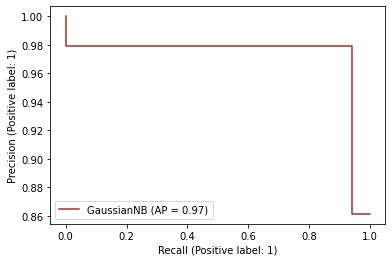

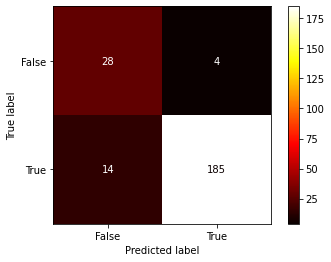

In [197]:
from sklearn import metrics
pred = gnb.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(gnb, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (LR)

Precision:  0.949238578680203
Recall:  0.9396984924623115
F1 Score:  0.9444444444444445


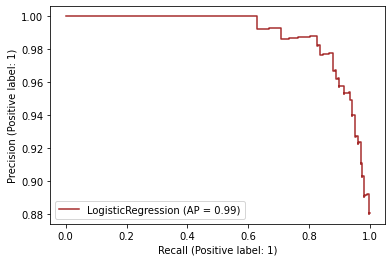

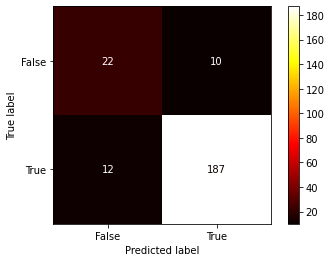

In [198]:
from sklearn import metrics
pred = lg.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(lg, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (DT)

Precision:  0.8974358974358975
Recall:  0.8793969849246231
F1 Score:  0.9444444444444445


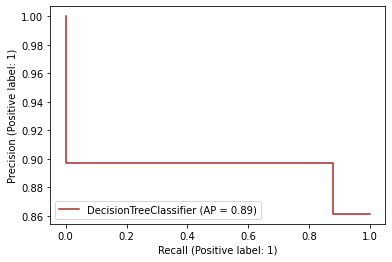

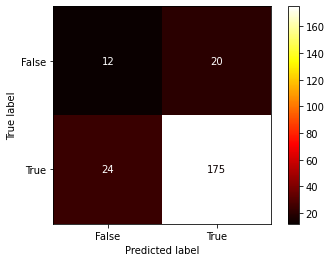

In [199]:
from sklearn import metrics
pred = dt.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
ff1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(dt, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()